In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [213]:
df = pd.read_csv('laptop_data.csv')

In [214]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [215]:
df = df.drop(columns = ['Unnamed: 0'])

In [216]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832


In [217]:
df.shape

(1303, 11)

In [218]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [219]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1298     True
1299     True
1300     True
1301     True
1302     True
Length: 1303, dtype: bool

In [220]:
df = df.drop_duplicates()

In [221]:
df.shape

(1274, 11)

### Removing the GB and kg

In [222]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg', '')

In [223]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832


# Univariate Analysis


## Checking the Price disribution of the Laptops

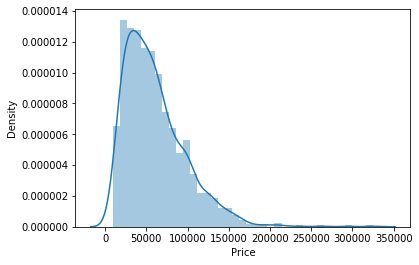

In [224]:
sns.distplot(df['Price'])

## Distribution of Companies

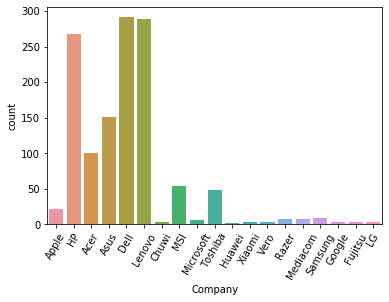

In [225]:
sns.countplot(x='Company', data = df)
plt.xticks(rotation = 60)
plt.show()

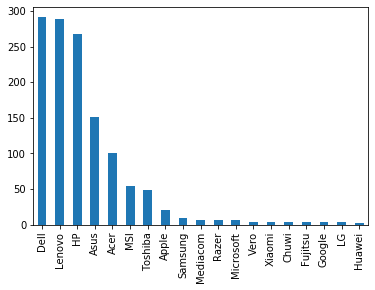

In [226]:
df['Company'].value_counts().plot(kind='bar')

## Distribution of various types of Laptops

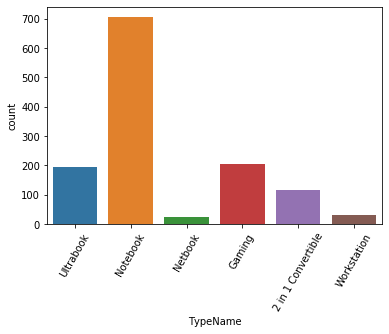

In [227]:
sns.countplot(x='TypeName', data = df)
plt.xticks(rotation = 60)
plt.show()

## Average Pricing of laptops based on Brands

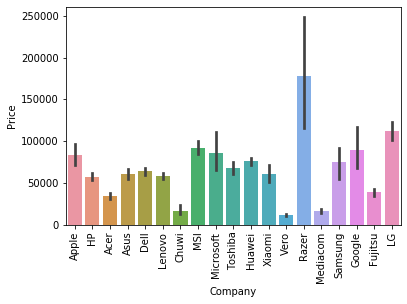

In [228]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

## Average Pricing of laptops based on type of Laptop

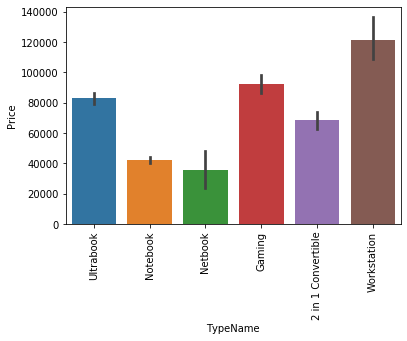

In [229]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

## Checking the distribution of Laptop based on its size

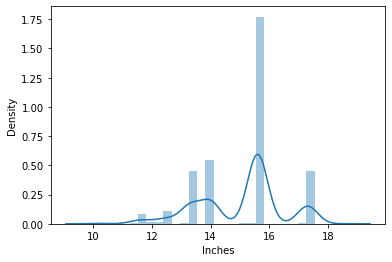

In [230]:
sns.distplot(df['Inches'])

## Checking the correlation and the distribution of laptop prices based on size

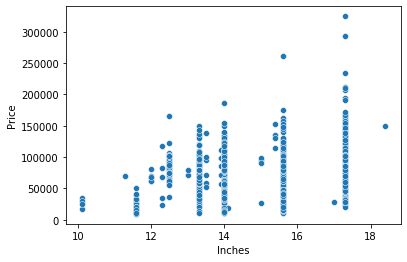

In [231]:
sns.scatterplot(x = df['Inches'], y = df['Price'])

In [232]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [233]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Retina Display 2880x1800            

## Creating a new column to check whether the laptop is a touchscreen or not

In [234]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

In [235]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [236]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
192,Xiaomi,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce MX150,No OS,1.3,53274.672,0
670,Microsoft,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10 S,1.252,99519.048,1
111,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7560U 2.4GHz,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23,73473.120,1
312,MSI,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.8,111834.720,0
217,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.63,54931.680,0


## Checking the price distribution based on the new feature TouchScreen

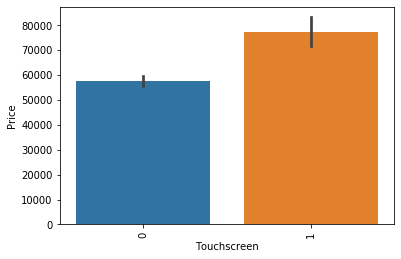

In [237]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

## Creating a new column to check the laptop for the type of screen i.e whether it has IPS or not

In [238]:
df['IPS'] = df['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0)

In [239]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


## Price Distribution based on the display type

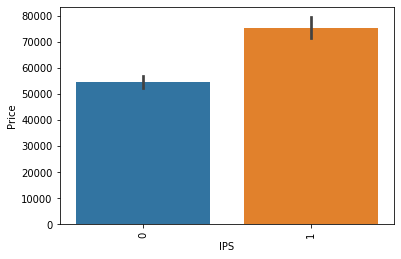

In [240]:
sns.barplot(x=df['IPS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

## Splitting the Screen Resolution on pixels

In [241]:
pixels = df['ScreenResolution'].str.split('x',expand =True)

In [242]:
df['x_res'] = pixels[0]
df['y_res'] = pixels[1]

In [243]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600


## Removing the content in x_res

In [244]:
df['x_res'] = df['x_res'].str.replace(',','')

In [245]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600


In [246]:
df['x_res'].str.findall(r'(\d)')

0       [2, 5, 6, 0]
1       [1, 4, 4, 0]
2       [1, 9, 2, 0]
3       [2, 8, 8, 0]
4       [2, 5, 6, 0]
            ...     
1269    [1, 3, 6, 6]
1270    [1, 9, 2, 0]
1271    [3, 2, 0, 0]
1272    [1, 3, 6, 6]
1273    [1, 3, 6, 6]
Name: x_res, Length: 1274, dtype: object

In [247]:
df['x_res'].str.findall(r'(\d+\.?\d+)')

0       [2560]
1       [1440]
2       [1920]
3       [2880]
4       [2560]
         ...  
1269    [1366]
1270    [1920]
1271    [3200]
1272    [1366]
1273    [1366]
Name: x_res, Length: 1274, dtype: object

In [248]:
df['x_res'].str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1269    1366
1270    1920
1271    3200
1272    1366
1273    1366
Name: x_res, Length: 1274, dtype: object

In [249]:
df['x_res'] = df['x_res'].str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

In [250]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900


In [251]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
Touchscreen           int64
IPS                   int64
x_res                object
y_res                object
dtype: object

# Changing the data type of the columns

In [252]:
df['x_res'] = df['x_res'].astype('int32')
df['y_res'] = df['y_res'].astype('int32')
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [253]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float32
Price               float64
Touchscreen           int64
IPS                   int64
x_res                 int32
y_res                 int32
dtype: object

In [254]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


## Checking the correlation of various columns wrt Price

#### 1st way to check correlation

In [255]:
corr = df.corr()

In [256]:
print(corr['Price'].sort_values())

Inches         0.066990
Touchscreen    0.188631
Weight         0.212192
IPS            0.250358
y_res          0.548111
x_res          0.552074
Ram            0.740106
Price          1.000000
Name: Price, dtype: float64


#### 2nd way to check correlation

In [257]:
df.corr()['Price']

Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
Touchscreen    0.188631
IPS            0.250358
x_res          0.552074
y_res          0.548111
Name: Price, dtype: float64

## Pixels are having a strong correlation with Price whereas inches dont effect the price that much.
So creating a new column with PPI, pixels per inch

## Use the Pythagorean Theorem and the screen width and height in pixels to calculate the diagonal length in pixels:

 #### diagonal=√width^2+height^2
 
 ((df['x_res']**2) + (df['y_res']**2))**0.5
 
#### PPI = diagonal in pixels / diagonal in inches

In [258]:
df['ppi'] = ((df['x_res']**2) + (df['y_res']**2))**0.5 / df['Inches']

In [259]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940


In [260]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float32
Price               float64
Touchscreen           int64
IPS                   int64
x_res                 int32
y_res                 int32
ppi                 float64
dtype: object

## Checking the correlation again

In [261]:
df.corr()['Price']

Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
Touchscreen    0.188631
IPS            0.250358
x_res          0.552074
y_res          0.548111
ppi            0.469539
Name: Price, dtype: float64

In [262]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005


In [263]:
df = df.drop(columns = ['ScreenResolution', 'Inches', 'x_res','y_res'])

In [264]:
df.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940


In [265]:
df['Cpu'].to_list()

['Intel Core i5 2.3GHz',
 'Intel Core i5 1.8GHz',
 'Intel Core i5 7200U 2.5GHz',
 'Intel Core i7 2.7GHz',
 'Intel Core i5 3.1GHz',
 'AMD A9-Series 9420 3GHz',
 'Intel Core i7 2.2GHz',
 'Intel Core i5 1.8GHz',
 'Intel Core i7 8550U 1.8GHz',
 'Intel Core i5 8250U 1.6GHz',
 'Intel Core i5 7200U 2.5GHz',
 'Intel Core i3 6006U 2GHz',
 'Intel Core i7 2.8GHz',
 'Intel Core i3 6006U 2GHz',
 'Intel Core M m3 1.2GHz',
 'Intel Core i5 2.3GHz',
 'Intel Core i7 7500U 2.7GHz',
 'Intel Core i7 2.9GHz',
 'Intel Core i3 7100U 2.4GHz',
 'Intel Core i5 8250U 1.6GHz',
 'Intel Atom x5-Z8350 1.44GHz',
 'Intel Core i5 7300HQ 2.5GHz',
 'AMD E-Series E2-9000e 1.5GHz',
 'Intel Core i5 8250U 1.6GHz',
 'Intel Core i7 8550U 1.8GHz',
 'Intel Core i3 6006U 2GHz',
 'Intel Core i5 1.6GHz',
 'Intel Core i5 8250U 1.6GHz',
 'Intel Core i7 8650U 1.9GHz',
 'Intel Core i5 8250U 1.6GHz',
 'Intel Atom x5-Z8300 1.44GHz',
 'AMD E-Series E2-6110 1.5GHz',
 'AMD A6-Series 9220 2.5GHz',
 'Intel Core i7 8550U 1.8GHz',
 'Intel Core i

In [266]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              132
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
                                       ... 
Intel Core i7 7500U 2.5GHz                1
Intel Celeron Dual Core N3350 2.0GHz      1
AMD Ryzen 1600 3.2GHz                     1
Intel Core i7 7700HQ 2.7GHz               1
Intel Core i7 2.9GHz                      1
Name: Cpu, Length: 118, dtype: int64

## Differentiating the Cpu's based on the processors

In [267]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [268]:
df['Cpu'].apply(lambda x : x.split())

0                         [Intel, Core, i5, 2.3GHz]
1                         [Intel, Core, i5, 1.8GHz]
2                  [Intel, Core, i5, 7200U, 2.5GHz]
3                         [Intel, Core, i7, 2.7GHz]
4                         [Intel, Core, i5, 3.1GHz]
                           ...                     
1269               [Intel, Core, i7, 6500U, 2.5GHz]
1270               [Intel, Core, i7, 6500U, 2.5GHz]
1271               [Intel, Core, i7, 6500U, 2.5GHz]
1272    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
1273               [Intel, Core, i7, 6500U, 2.5GHz]
Name: Cpu, Length: 1274, dtype: object

In [269]:
df['Cpu'].apply(lambda x : x.split()[0:3])

0            [Intel, Core, i5]
1            [Intel, Core, i5]
2            [Intel, Core, i5]
3            [Intel, Core, i7]
4            [Intel, Core, i5]
                 ...          
1269         [Intel, Core, i7]
1270         [Intel, Core, i7]
1271         [Intel, Core, i7]
1272    [Intel, Celeron, Dual]
1273         [Intel, Core, i7]
Name: Cpu, Length: 1274, dtype: object

## We have to join these into a single phrase

In [270]:
df['Cpu'].apply(lambda x : " ".join(x.split()[0:3]))

0            Intel Core i5
1            Intel Core i5
2            Intel Core i5
3            Intel Core i7
4            Intel Core i5
               ...        
1269         Intel Core i7
1270         Intel Core i7
1271         Intel Core i7
1272    Intel Celeron Dual
1273         Intel Core i7
Name: Cpu, Length: 1274, dtype: object

In [271]:
df['cpu_name'] = df['Cpu'].apply(lambda x : " ".join(x.split()[0:3]))

In [272]:
df.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5


In [273]:
def fetch_processor(name):
    if name == 'Intel Core i7' or name == 'Intel Core i5' or name == 'Intel Core i3':
        return name
    else:
        if name.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [274]:
df['Processor'] = df['cpu_name'].apply(fetch_processor)

In [275]:
df.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,cpu_name,Processor
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5


In [276]:
df = df.drop(columns = ['cpu_name','Cpu'])

In [277]:
df.head(1)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Processor
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5


## Pricing based on Processor

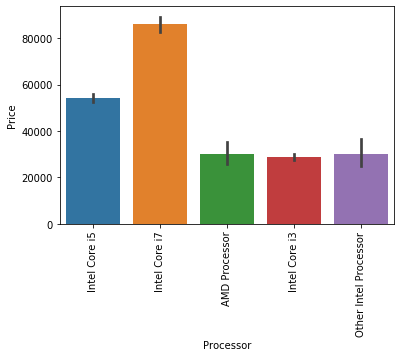

In [278]:
sns.barplot(x=df['Processor'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

## Pricing Based on Ram

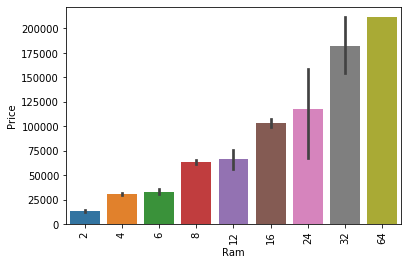

In [279]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

## Pricing Based on Memory

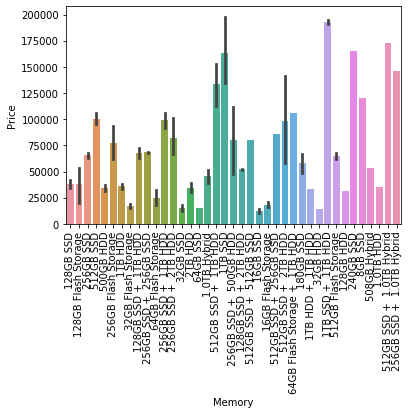

In [280]:
sns.barplot(x=df['Memory'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [281]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
1.0TB Hybrid                       7
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
1TB SSD +  1TB HDD                 2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
512GB SSD +  256GB SSD             1
5

### There are many variants  
#### so they have to be split

In [282]:
df.head(1)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Processor
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5


In [283]:
df['Memory'] = df['Memory'].str.replace('\.0','')
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','000')

In [284]:
df['Memory'].value_counts()

256 SSD                         412
1000 HDD                        216
500 HDD                         123
512 SSD                         114
128 SSD +  1000 HDD              94
128 SSD                          74
256 SSD +  1000 HDD              73
32 Flash Storage                 36
2000 HDD                         16
512 SSD +  1000 HDD              14
1000 SSD                         14
64 Flash Storage                 13
256 SSD +  2000 HDD              10
256 Flash Storage                 8
1000 Hybrid                       7
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
1000 SSD +  1000 HDD              2
512 Flash Storage                 2
128 SSD +  2000 HDD               2
256 SSD +  500 HDD                2
256 SSD +  256 SSD                2
240 SSD                           1
8 SSD                       

In [285]:
split = df['Memory'].str.split('+',n =1, expand = True)

In [286]:
split.sample(10)

,0,1
598,256 SSD,None
608,256 SSD,None
647,256 SSD,None
466,500 HDD,None
19,128 SSD,None
566,500 HDD,None
684,512 SSD,None
17,512 SSD,None
1047,256 SSD,1000 HDD
1040,256 SSD,None


In [287]:
df['first'] = split[0]
df['first'] = df['first'].str.strip()

df['second'] = split[1]
df['second'].fillna('0',inplace = True)
df['second'] = df['second'].str.strip()

In [288]:
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Processor,first,second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0


In [289]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)


In [290]:
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Processor,first,second,Layer1HDD,Layer1SSD,Layer1Flash_Storage,Layer1Hybrid
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,1,0


In [291]:
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Processor,first,second,Layer1HDD,Layer1SSD,Layer1Flash_Storage,Layer1Hybrid
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,1,0


In [292]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [293]:
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,first,second,Layer1HDD,Layer1SSD,Layer1Flash_Storage,Layer1Hybrid,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128 SSD,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128 Flash Storage,0,0,0,1,0,0,0,0,0


In [294]:
df['first'] = df['first'].str.replace(r'\D','')

In [295]:
df.head(1)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,first,second,Layer1HDD,Layer1SSD,Layer1Flash_Storage,Layer1Hybrid,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,0,1,0,0,0,0,0,0


In [296]:
df['second'] = df['second'].str.replace(r'\D','')

In [297]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [298]:
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,first,second,Layer1HDD,Layer1SSD,Layer1Flash_Storage,Layer1Hybrid,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,1,0,0,0,0,0


In [299]:
df['HDD'] = df['first'] * df['Layer1HDD'] + df['second'] * df['Layer2HDD']
df['SSD'] = df['first'] * df['Layer1SSD'] + df['second'] * df['Layer2SSD']
df['Flash_Storage'] = df['first'] * df['Layer1Flash_Storage'] + df['second'] * df['Layer2Flash_Storage']
df['Hybrid'] = df['first'] * df['Layer1Hybrid'] + df['second'] * df['Layer2Hybrid']

In [300]:
df.sample(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,Layer1Flash_Storage,Layer1Hybrid,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Flash_Storage,Hybrid
674,HP,2 in 1 Convertible,4,128 SSD,Nvidia GeForce 940MX,Windows 10,1.63,37242.72,1,1,...,0,0,0,0,0,0,0,128,0,0
606,Toshiba,Notebook,8,256 SSD,Intel HD Graphics 520,Windows 10,2.20,74538.72,0,1,...,0,0,0,0,0,0,0,256,0,0


In [301]:
df = df.drop(columns = ['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'])

In [302]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Processor,HDD,SSD,Flash_Storage,Hybrid
960,Toshiba,Notebook,8,256 SSD,Intel HD Graphics 520,Windows 10,1.20,81784.80,0,0,165.632118,Intel Core i5,0,256,0,0
276,Dell,Notebook,8,128 SSD + 1000 HDD,AMD Radeon 530,Linux,2.80,58554.72,0,0,127.335675,Intel Core i7,1000,128,0,0
109,Lenovo,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.58,78854.40,0,1,157.350512,Intel Core i7,0,256,0,0
871,Lenovo,Notebook,4,1000 HDD,AMD Radeon R5 M430,No OS,2.20,25521.12,0,0,141.211998,Intel Core i3,1000,0,0,0
301,Asus,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,2.90,113060.16,0,0,127.335675,Intel Core i7,1000,256,0,0


In [303]:
df = df.drop(columns = ['Memory'])

In [304]:
df.corr()['Price']

Ram              0.740106
Weight           0.212192
Price            1.000000
Touchscreen      0.188631
IPS              0.250358
ppi              0.469539
HDD             -0.098011
SSD              0.669957
Flash_Storage   -0.037176
Hybrid           0.022533
Name: Price, dtype: float64

In [306]:
df.drop(columns = ['Flash_Storage', 'Hybrid'])

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Processor,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,100.454670,Intel Core i7,500,0
1270,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128
1271,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512
1272,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0


In [307]:
df['Gpu'].value_counts()

Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD R17M-M1-70               1
AMD FirePro W6150M           1
Nvidia GTX 980 SLI           1
Nvidia Quadro M620M          1
AMD Radeon R5 520            1
Name: Gpu, Length: 110, dtype: int64

In [311]:
df['gpu_brand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [312]:
df.head(1)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Processor,HDD,SSD,Flash_Storage,Hybrid,gpu_brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel


In [315]:
df = df.drop(columns = ['Gpu'])

In [316]:
df.head(1)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Processor,HDD,SSD,Flash_Storage,Hybrid,gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel


In [317]:
df['gpu_brand'].value_counts()

Intel     703
Nvidia    396
AMD       174
ARM         1
Name: gpu_brand, dtype: int64

In [320]:
df = df[df['gpu_brand'] != 'ARM']

In [321]:
df['gpu_brand'].value_counts()

Intel     703
Nvidia    396
AMD       174
Name: gpu_brand, dtype: int64

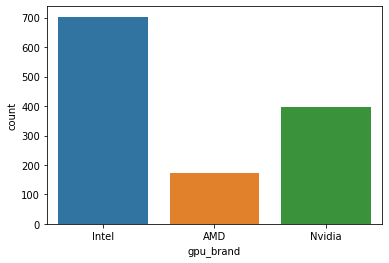

In [322]:
sns.countplot(x = 'gpu_brand', data = df)

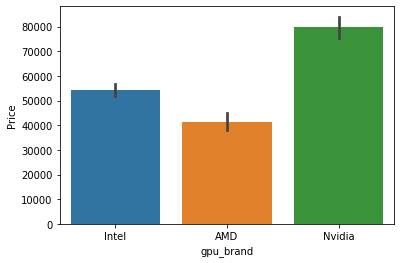

In [323]:
sns.barplot(x= df['gpu_brand'], y = df['Price'])

In [324]:
df.head(1)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Processor,HDD,SSD,Flash_Storage,Hybrid,gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel


In [325]:
df['OpSys'].value_counts()

Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

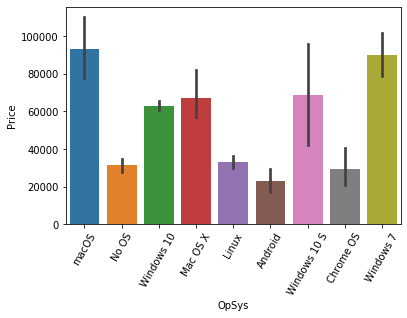

In [327]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='60')
plt.show()

In [328]:
def OS(name):
    if name == 'Windows 10' or name == 'Windows 10 S' or name == 'Windows 7':
        return 'Windows'
    else:
        if name == 'Mac OS X' or name == 'macOS':
            return 'MAC'
        else:
            return 'Others/No OS/Linux'

In [329]:
df['OS'] = df['OpSys'].apply(OS)

In [330]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Processor,HDD,SSD,Flash_Storage,Hybrid,gpu_brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,MAC
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,128,0,Intel,MAC
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,MAC
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,MAC


In [332]:
df = df.drop(columns = ['OpSys'])

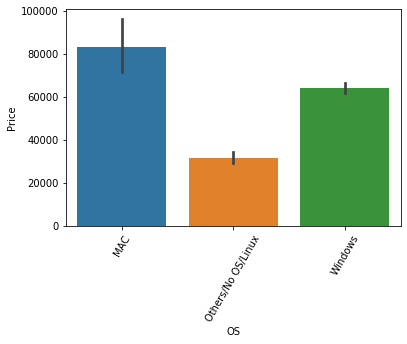

In [334]:
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='60')
plt.show()

In [333]:
df.head(2)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Processor,HDD,SSD,Flash_Storage,Hybrid,gpu_brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,MAC
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,128,0,Intel,MAC


In [335]:
df.corr()['Price']

Ram              0.739996
Weight           0.211667
Price            1.000000
Touchscreen      0.190382
IPS              0.251514
ppi              0.471481
HDD             -0.098481
SSD              0.669808
Flash_Storage   -0.036712
Hybrid           0.022490
Name: Price, dtype: float64

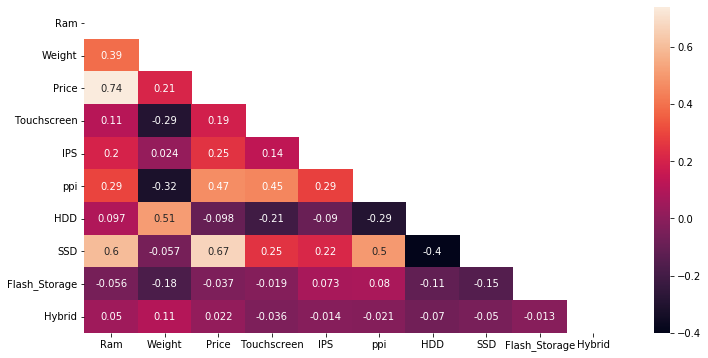

In [337]:
plt.figure(figsize =(12,6))
trim = np.triu(df.corr())
sns.heatmap(df.corr(),annot = True, mask = trim)